In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
filename = 'data_temp_sweep.txt'

measurements = []

f = open(filename)
line = f.readline()

while line != "":
    if line.startswith('@'):
        temp = float(line.strip().split(' ')[1])
    elif line.startswith('Temp: '):
        measurement = float(line.strip().split(' ')[1]) / 100
        measurements.append([temp, measurement])
    
    line = f.readline()

f.close()

In [3]:
df = pd.DataFrame(measurements, columns=['Temperature', 'Measurement'])
df['Difference'] = df['Measurement'] - df['Temperature']
statistics = df.groupby('Temperature').describe()
statistics

Measurement                                                        \
                  count       mean       std    min      25%     50%      75%   
Temperature                                                                     
5.00               41.0   5.006585  0.203207   4.66   4.8100   5.040   5.1600   
9.81               31.0   9.232581  0.121435   8.95   9.1600   9.220   9.3100   
14.94              34.0  14.800882  0.154652  14.50  14.6875  14.785  14.9425   
19.75              47.0  20.156596  0.136019  19.75  20.0650  20.170  20.2600   
24.63              65.0  25.305231  0.114498  25.02  25.2300  25.320  25.3800   
29.63              46.0  30.795000  0.147614  30.45  30.6975  30.795  30.8925   
34.63              62.0  36.120000  0.133392  35.76  36.0300  36.120  36.2100   
39.88              65.0  41.422615  0.110740  41.13  41.3400  41.430  41.5200   
44.69              51.0  46.275294  0.150165  45.78  46.1850  46.290  46.3800   
49.69              51.0  50.992353  0.092338  50.79  50.9400  51.000  51.0450   
54.56              51.0  55.477059  0.129326  55.17  55.4100  55.500  55.5600   
59.38              35.0  60.459429  0.124072  60.09  60.3900  60.480  60.5400   
64.19              47.0  65.138936  0.108512  64.92  65.0700  65.130  65.2200   
69.19              56.0  71.108571  0.138806  70.68  71.0100  71.100  71.2200   
74.06              62.0  76.012258  0.126807  75.54  75.9375  76.020  76.0800   
79.25              47.0  80.717234  0.131177  80.46  80.6550  80.700  80.7600   

                   Difference                                           \
               max      count      mean       std   min     25%    50%   
Temperature                                                              
5.00          5.40       41.0  0.006585  0.203207 -0.34 -0.1900  0.040   
9.81          9.49       31.0 -0.577419  0.121435 -0.86 -0.6500 -0.590   
14.94        15.13       34.0 -0.139118  0.154652 -0.44 -0.2525 -0.155   
19.75        20.38       47.0  0.406596  0.136019  0.00  0.3150  0.420   
24.63        25.53       65.0  0.675231  0.114498  0.39  0.6000  0.690   
29.63        31.05       46.0  1.165000  0.147614  0.82  1.0675  1.165   
34.63        36.36       62.0  1.490000  0.133392  1.13  1.4000  1.490   
39.88        41.61       65.0  1.542615  0.110740  1.25  1.4600  1.550   
44.69        46.47       51.0  1.585294  0.150165  1.09  1.4950  1.600   
49.69        51.18       51.0  1.302353  0.092338  1.10  1.2500  1.310   
54.56        55.71       51.0  0.917059  0.129326  0.61  0.8500  0.940   
59.38        60.66       35.0  1.079429  0.124072  0.71  1.0100  1.100   
64.19        65.28       47.0  0.948936  0.108512  0.73  0.8800  0.940   
69.19        71.37       56.0  1.918571  0.138806  1.49  1.8200  1.910   
74.06        76.29       62.0  1.952258  0.126807  1.48  1.8775  1.960   
79.25        81.33       47.0  1.467234  0.131177  1.21  1.4050  1.450   

                           
                75%   max  
Temperature                
5.00         0.1600  0.40  
9.81        -0.5000 -0.32  
14.94        0.0025  0.19  
19.75        0.5100  0.63  
24.63        0.7500  0.90  
29.63        1.2625  1.42  
34.63        1.5800  1.73  
39.88        1.6400  1.73  
44.69        1.6900  1.78  
49.69        1.3550  1.49  
54.56        1.0000  1.15  
59.38        1.1600  1.28  
64.19        1.0300  1.09  
69.19        2.0300  2.18  
74.06        2.0200  2.23  
79.25        1.5100  2.08

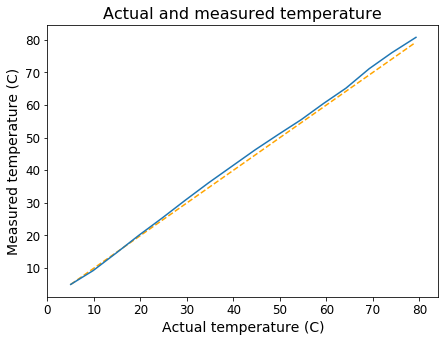

In [4]:
plt.plot(np.arange(5, 80), np.arange(5, 80), '--', color='orange')
statistics['Measurement', 'mean'].plot(figsize=(7, 5), fontsize=12)
plt.title('Actual and measured temperature', fontsize=16)
plt.xlim((0, 84))
plt.xlabel('Actual temperature (C)', fontsize=14)
plt.ylabel('Measured temperature (C)', fontsize=14)
plt.show()

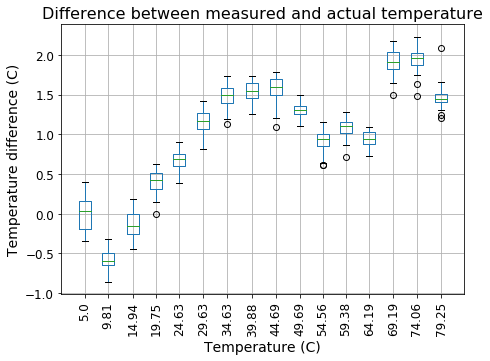

In [5]:
df.boxplot(by='Temperature', column='Difference', positions=df['Temperature'].unique(), figsize=(7, 5), widths=2.5, rot=90, fontsize=12)
plt.title('Difference between measured and actual temperature', fontsize=16)
plt.suptitle('')
plt.xlim((0, 84))
plt.xlabel('Temperature (C)', fontsize=14)
plt.ylabel('Temperature difference (C)', fontsize=14)
plt.show()